<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/ComputerVision_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow import keras
from sklearn.datasets import load_sample_image
import matplotlib as mpl
np.random.seed(42)
tf.random.set_seed(42)

# Convolution_Tensorflow

In [7]:
#픽셀값을 0~1 로
china_image = load_sample_image("china.jpg") / 255.
flower_image = load_sample_image("flower.jpg") / 255.
images = np.array([china_image, flower_image])
batch_size, height, width, channels = images.shape
print(images.shape)

(2, 427, 640, 3)


(2, 427, 640, 2)


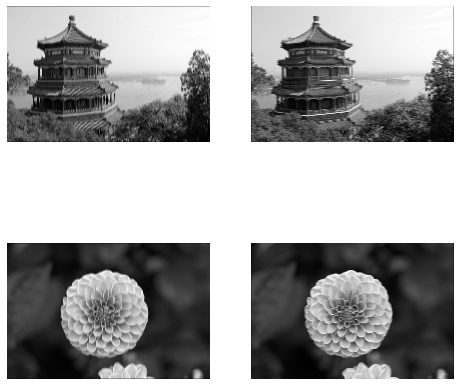

In [26]:
#2개의 수직, 수평 필터
filters = np.zeros(shape=(7,7, channels, 2), dtype=np.float32)
filters[:, 3, : ,0] = 1
filters[3, :, :, 1] = 1

#저수준 컨볼루션 뉴런 계산
outputs = tf.nn.conv2d(images, filters, strides=1, padding='SAME')
print(outputs.shape)

plt.figure(figsize=(8,8))
for image_index in (0, 1):    
    for feature_map_index in (0, 1):
        plt.subplot(2,2,image_index * 2 + feature_map_index + 1)
        plt.imshow(outputs[image_index, :, :, feature_map_index], cmap="gray", interpolation="nearest")
        plt.axis("off")
plt.show()

In [29]:
#고수준 케라스 컨볼루션 레이어
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')


# MaxPooling


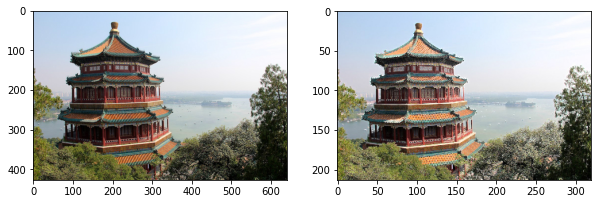

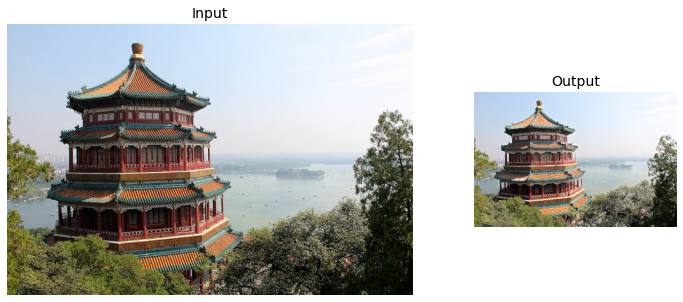

In [39]:
max_pool = keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid', input_shape=images.shape)
output = max_pool(images)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(images[0])
#plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(output[0])
#plt.axis("off")
plt.show()

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(images[0])  # 첫 번째 이미지 그리기
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # 첫 번째 이미지 출력 그리기
ax2.axis("off")
plt.show()

# Depth_Wise_Pooling

In [43]:
class DepthMaxPool(keras.layers.Layer):
    def __init__(self, pool_size, strides=None, padding='VALID', **kwargs):
        super().__init__(**kwargs)
        if strides is None:
            strides = pool_size
        self.pool_size= pool_size
        self.strides = strides
        self.padding = padding

    def call(self, inputs):
        return tf.nn.max_pool(inputs, 
                              #batch, height, width, channel
                              ksize=(1, 1, 1, self.pool_size),
                              strides=(1, 1, 1, self.strides),
                              padding=self.padding
        )

depth_pool = DepthMaxPool(3)
depth_output = depth_pool(images)

print(images.shape, depth_output.shape, sep='\n')

(2, 427, 640, 3)
(2, 427, 640, 1)


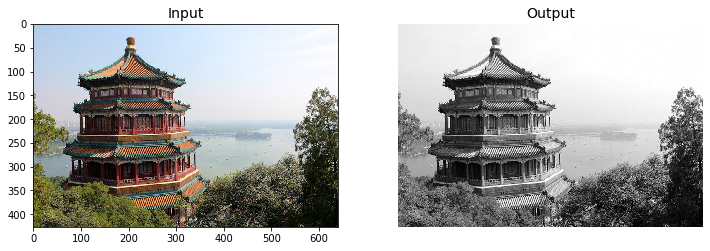

In [47]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Input", fontsize=14)
plt.imshow(images[0], interpolation="nearest")  # 첫 번째 이미지 그리기
plt.subplot(1, 2, 2)
plt.title("Output", fontsize=14)
plt.imshow(depth_output[0, ... , 0], cmap='gray', interpolation='nearest')  # 첫 번째 이미지 출력 그리기
plt.axis("off")
plt.show()
#채널이 색정보를 지닌 채널이기 때문에, RGB중 가장 강한 값을 추출한다.

# Global_Max_Pooling

In [52]:
global_avg_pool = keras.layers.GlobalAvgPool2D()
global_output = global_avg_pool(images)
print(images.shape, global_output.shape,global_output, sep='\n')

global_avg_pool_2 = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1, 2]))
global_output_2 = global_avg_pool_2(images)
print(global_output_2.shape, global_output_2, sep='\n')


(2, 427, 640, 3)
(2, 3)
tf.Tensor(
[[0.56767327 0.5706355  0.5528319 ]
 [0.21627817 0.28856644 0.2232219 ]], shape=(2, 3), dtype=float32)
(2, 3)
tf.Tensor(
[[0.56767327 0.5706355  0.5528319 ]
 [0.21627817 0.28856644 0.2232219 ]], shape=(2, 3), dtype=float32)


# MNIST_CNN_Model

In [54]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + keras.backend.epsilon()

X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]
print(X_train.shape)

(55000, 28, 28, 1)
